In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv ("D:\\ai\\datasets\\carte di credito\\creditcard.csv")
data.head ()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.isnull ().sum ()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

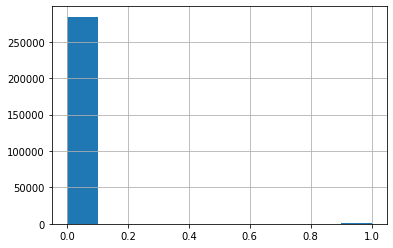

In [8]:
data["Class"].hist()

In [9]:
1- data [data["Class"] == 1].count().sum()/ data["Class"].count()

0.9464479454507789

In [10]:
non_frode = data[data["Class"] == 0]
frode = data[data["Class"] == 1]

In [11]:
frode.shape

(492, 31)

In [12]:
non_frode = non_frode.sample (frode.shape[0])

In [13]:
data = frode.append (non_frode, ignore_index=True)

In [14]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [15]:
data["Class"].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [16]:
X = data.drop ("Class",axis = 1)
y = data["Class"]

In [17]:
X_train, X_test, y_train, y_test =train_test_split (X,y,test_size = 0.2,stratify = y,random_state = 0)

In [18]:
data.describe ()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,89464.263211,-2.350410,1.786114,-3.490047,2.199358,-1.552648,-0.683964,-2.821240,0.308366,-1.277582,...,0.339959,0.040878,0.002515,-0.048071,-0.005740,0.024666,0.090829,0.042620,98.326433,0.500000
std,48251.278288,5.524348,3.729743,6.226373,3.240427,4.210153,1.789003,5.841649,4.903521,2.336236,...,2.802077,1.182388,1.199071,0.584607,0.682188,0.490011,1.015196,0.435480,220.835404,0.500254
min,406.000000,-30.552380,-14.283875,-31.103685,-3.818624,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.206378,-7.263482,-2.839512,0.000000,0.000000
25%,48128.500000,-2.788129,-0.149685,-5.084967,-0.243813,-1.767798,-1.599082,-3.107826,-0.182701,-2.313050,...,-0.166723,-0.521657,-0.221737,-0.405859,-0.339620,-0.271778,-0.055177,-0.056150,1.000000,0.000000
50%,82880.500000,-0.694165,0.885561,-1.320103,1.287041,-0.444286,-0.630181,-0.691553,0.168482,-0.723694,...,0.158002,0.078933,-0.026371,0.007696,0.036445,-0.025394,0.059628,0.035679,15.825000,0.500000
75%,137146.500000,1.062748,2.793742,0.342652,4.184137,0.496075,0.073240,0.262569,0.853157,0.205266,...,0.624776,0.613513,0.191459,0.381696,0.369868,0.322613,0.434981,0.220976,99.990000,1.000000
max,172204.000000,2.328681,22.057729,3.439154,12.114672,11.095089,6.474115,5.802537,20.007208,7.796227,...,27.202839,8.361985,9.974239,3.138056,2.265639,3.067907,4.374186,2.972826,2287.200000,1.000000


In [19]:
scaler = StandardScaler ()
X_train = scaler.fit_transform (X_train)
X_test = scaler.transform (X_test)

y_train = y_train.to_numpy ()
y_test = y_test.to_numpy ()

In [20]:
X_train = X_train.reshape (*X_train.shape,1)
X_test = X_test.reshape (*X_test.shape,1)

In [21]:
X_test.shape

(197, 30, 1)

In [22]:
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Dropout(.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile (
    optimizer = Adam (lr = .0001),
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [25]:
EPOCHS = 20

In [26]:
history = model.fit (X_train,y_train, batch_size=32, epochs = EPOCHS, validation_data=(X_test,y_test))

Epoch 1/20
25/25 [==============================] - 0s 18ms/step - loss: 0.7280 - accuracy: 0.6684 - val_loss: 0.5942 - val_accuracy: 0.8832
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4587 - accuracy: 0.8170 - val_loss: 0.5360 - val_accuracy: 0.9086
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3804 - accuracy: 0.8602 - val_loss: 0.4929 - val_accuracy: 0.9137
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3085 - accuracy: 0.8869 - val_loss: 0.4710 - val_accuracy: 0.8934
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3271 - accuracy: 0.8831 - val_loss: 0.4360 - val_accuracy: 0.9086
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2922 - accuracy: 0.8958 - val_loss: 0.4144 - val_accuracy: 0.8629
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2556 - accuracy: 0.9060 - val_loss: 0.3816 - val_accuracy: 0.8985
Epoch 8/20
25/25 [=

In [27]:
def plot_learningCurve(history, epoch):
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()



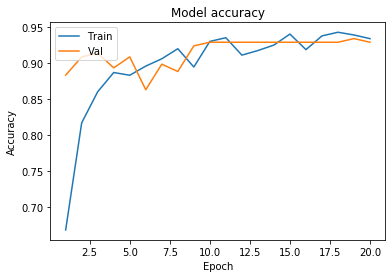

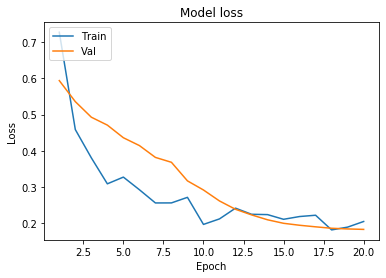

In [28]:
plot_learningCurve (history, EPOCHS)

In [32]:
EPOCHS = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train,batch_size = 32, epochs=EPOCHS, validation_data=(X_test, y_test))

Epoch 1/50
25/25 [==============================] - 0s 12ms/step - loss: 0.9598 - accuracy: 0.5972 - val_loss: 0.6628 - val_accuracy: 0.7360
Epoch 2/50
25/25 [==============================] - 0s 7ms/step - loss: 0.7548 - accuracy: 0.6557 - val_loss: 0.6308 - val_accuracy: 0.7005
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6674 - accuracy: 0.6849 - val_loss: 0.6093 - val_accuracy: 0.6447
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 0.5939 - accuracy: 0.7332 - val_loss: 0.5927 - val_accuracy: 0.6447
Epoch 5/50
25/25 [==============================] - 0s 6ms/step - loss: 0.5714 - accuracy: 0.7548 - val_loss: 0.5754 - val_accuracy: 0.6599
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.5530 - accuracy: 0.7484 - val_loss: 0.5571 - val_accuracy: 0.6853
Epoch 7/50
25/25 [==============================] - 0s 6ms/step - loss: 0.4714 - accuracy: 0.8018 - val_loss: 0.5393 - val_accuracy: 0.7107
Epoch 8/50
25/25 [=

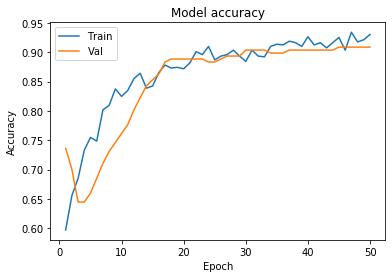

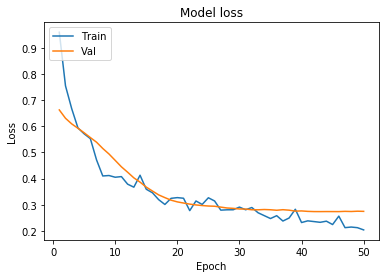

In [33]:
plot_learningCurve (history, EPOCHS)

In [42]:
def fraudolenta (dati, threshold = 60):
    dati = dati.reshape (1,*dati.shape)
    dati = scaler.transform (dati).reshape (*dati.shape,1)
    y = model.predict (dati) [0,0] *100
    return y> threshold

In [45]:
fraudolenta (
    np.array ([
        85285,-6.71340697159693,3.92110415204576,-9.74667821737542,5.14826254938013,-5.15156271985187,-2.09938865681113,-5.93776683170198,3.57877960420447,-4.6849517505833,-8.53775768653457,6.34897930341209,-8.68160893168352,0.251179384774619,-11.6080022570993,-0.351568782034355,-5.36356643348466,-11.9390915052116,-3.58360287020043,0.897402406121681,0.135711322729059,0.954272201927517,-0.45108644858101,0.127214424071711,-0.339449869297565,0.394095513633807,1.07529509891805,1.6499059092424,-0.394905372194808,252.92
    ])
)

True

In [47]:
model.save ("modello.h5")

In [50]:
import joblib

In [51]:
joblib.dump (scaler, "scaler.pkl")

['scaler.pkl']

In [54]:
sc = joblib.load ("scaler.pkl")

In [55]:
sc


StandardScaler(copy=True, with_mean=True, with_std=True)